# CLC - DAG

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import geopandas as gpd
import pandas as pd
from pathlib import Path
import rasterio

import nasa_hls

import src

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DAG graph

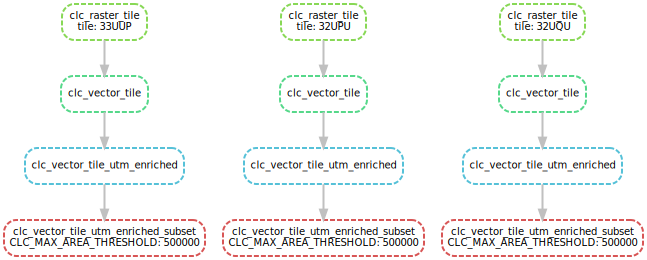

In [3]:
from IPython.display import SVG

SVG(filename="dag-graphs/dag_r2i_clc-to-tiled-vector-data.svg")

## Workflow

In [3]:
%%bash

cat ../../Snakefile_clc-to-tiled-vector-data

from src import configs
prjconf = configs.ProjectConfigParser()
TILES = prjconf.get("Params", "tiles").split(" ")

CLC_MAX_AREA_THRESHOLD = prjconf.get("Params", "clc_max_area_threshold")


rule all:
    input:
        expand("data/interim/clc/clc2018_{tile}_subset_{th}.gpkg", tile=TILES, th=CLC_MAX_AREA_THRESHOLD)


rule clc_raster_tile:
    input: 
        single_tile_footprint="data/raw/footprints/tiles/footprint_{tile}.gpkg",
        clc_raster="data/raw/clc/clc2018_clc2018_v2018_20b2_raster100m/clc2018_clc2018_V2018.20b2.tif"
    output: 
        temp("data/interim/clc/clc2018_{tile}_temp.tif")
    script:
        "scripts/clc-to-tiled-vector-data/clc_raster_tile.py"

rule clc_vector_tile:
    input: 
        "data/interim/clc/clc2018_{tile}_temp.tif"
    output: 
        temp("data/interim/clc/clc2018_{tile}_temp.gpkg")
    script:
        "scripts/clc-to-tiled-vector-data/clc_vector_tile.py"

rule clc_vector_tile_utm_enriched:
    input: 
        "data/raw/footprints/tiles/footp